In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Load Data

In [2]:
def read_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    return img

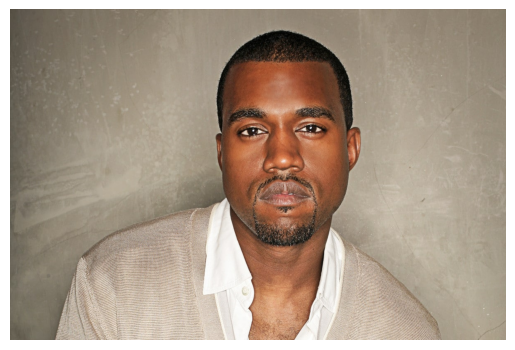

In [3]:
filename = r"./kawai-matthews-kanye-west-1.jpg"


img = read_image(filename)
org_img = np.copy(img)

## Create edge mask

In [4]:
def edge_mask(img, line_size, blur_value):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray_blur = cv2.medianBlur(gray, blur_value)
    
    edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)
    
    return edges

In [5]:
egdes = edge_mask(img, 9, 7)

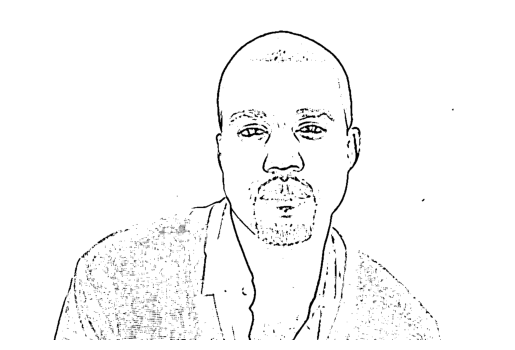

In [6]:
plt.imshow(egdes, cmap='gray')
plt.axis('off')
plt.show()

## Reduce the color pallate

In [7]:
def color_quantization(img, k):
    if img is None or not isinstance(img, np.ndarray):
        raise ValueError("Input image must be a valid numpy array")
    
    # Transform the image
    data = np.float32(img).reshape((-1, 3))
    
    # Determine criteria
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)
    
    # Implementing K-Means
    ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    
    center = np.uint8(center)
    result = center[label.flatten()]
    result = result.reshape(img.shape)
    
    return result

In [8]:
img_quantized = color_quantization(img, 9)

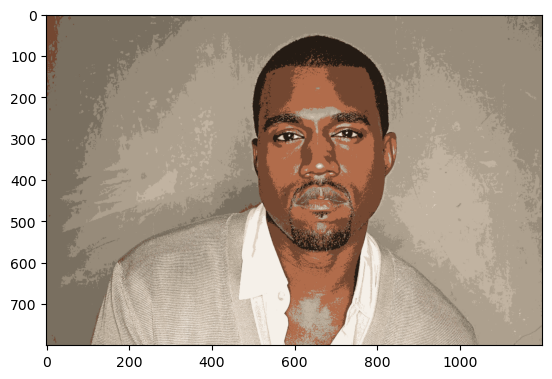

In [9]:
plt.imshow(img_quantized)
plt.show()

In [10]:
print(img.dtype)

uint8


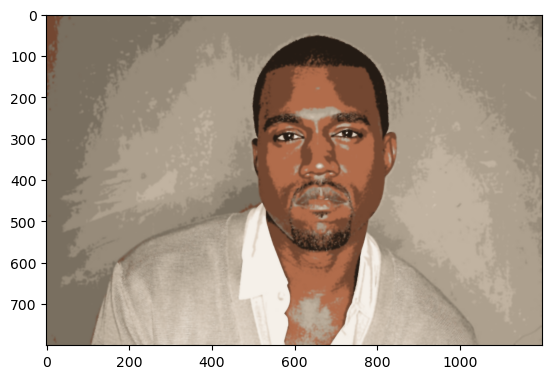

In [11]:
blurred = cv2.bilateralFilter(img_quantized, d=7, sigmaColor=200, sigmaSpace=200)

plt.imshow(blurred)
plt.show()

## Combine edge mask with quantized image

In [12]:
def cartoon(blurred,edges):
  c= cv2.bitwise_and(blurred, blurred, mask=edges)
  
  plt.imshow(c)
  plt.title("Cartoon Image")
  plt.show()
  
  

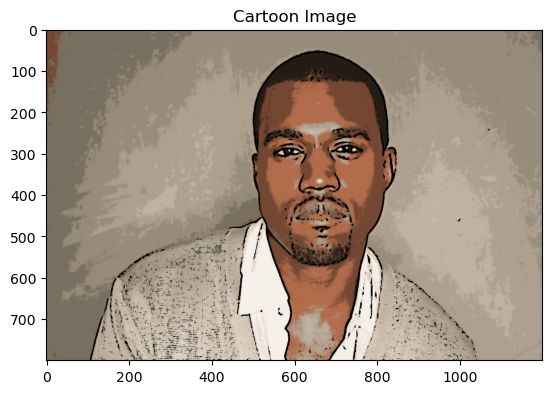

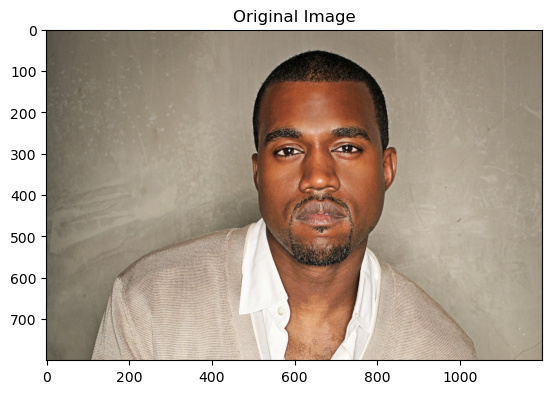

In [13]:
cartoon( blurred,egdes) 

plt.imshow(org_img)
plt.title("Original Image")
plt.show()